# Offset

Corrige las mediciones del ESP mediante un offset constante, que representa el gain del micrófono utilizado.
El offset se calcula a partir de la media del error entre las mediciones del ESP y un sonómetro calibrado.

Referencia: Sonómetro 3M SoundPro calibrado

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ordered_set import OrderedSet
import pickle

In [2]:
import sys
sys.path.append('..')
# Custom imports
from analysis_utils import DataContainer, plot_time_progression, color_map, calculate_mae, calculate_rmse, calculate_gain, plot_ref_gain, plot_ref_mae_rmse, plot_ambient_results, calculate_stdev, calculate_offset

## Cargar datos

Mediciones del ESP

In [3]:
with open("../results/offset/F_unwted.pkl", "rb") as file:
    offset_data_F_unwted = pickle.load(file)

with open("../results/offset/S_unwted.pkl", "rb") as file:
    offset_data_S_unwted = pickle.load(file)

with open("../results/offset/F_wted.pkl", "rb") as file:
    offset_data_F_wted = pickle.load(file)

with open("../results/offset/S_wted.pkl", "rb") as file:
    offset_data_S_wted = pickle.load(file)

Mediciones del sonómetro de referencia

In [4]:
with open("../results/offset/F_unwted_ref.pkl", "rb") as file:
    offset_data_F_unwted_ref = pickle.load(file)

with open("../results/offset/S_unwted_ref.pkl", "rb") as file:
    offset_data_S_unwted_ref = pickle.load(file)

with open("../results/offset/F_wted_ref.pkl", "rb") as file:
    offset_data_F_wted_ref = pickle.load(file)

with open("../results/offset/S_wted_ref.pkl", "rb") as file:
    offset_data_S_wted_ref = pickle.load(file)

## Periodo F, sin ponderación A

Mediciones en función del tiempo

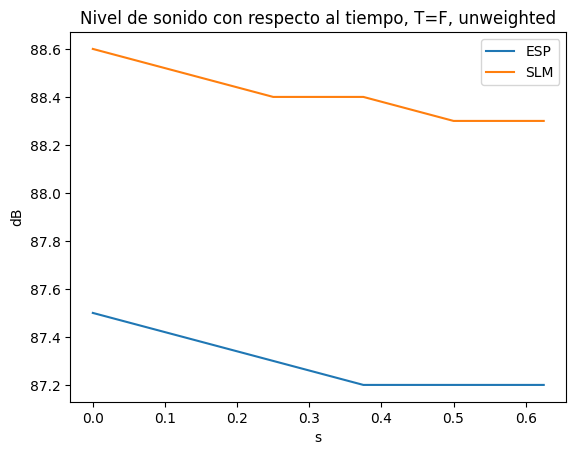

In [5]:
plot_time_progression(offset_data_F_unwted, offset_data_F_unwted_ref, "dB", f", T=F, unweighted", 0.125)

Valor del offset

In [6]:
print(calculate_offset(offset_data_F_unwted, offset_data_F_unwted_ref))

1.1166666666666647


## Periodo S, sin ponderación A

Mediciones en función del tiempo

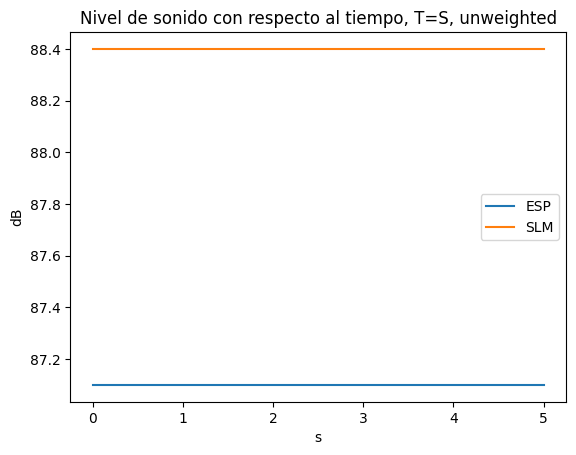

In [7]:
plot_time_progression(offset_data_S_unwted, offset_data_S_unwted_ref, "dB", f", T=S, unweighted", 1.0)

Valor del offset

In [8]:
print(calculate_offset(offset_data_S_unwted, offset_data_S_unwted_ref))

1.3000000000000114


## Periodo F, con ponderación A

Mediciones en función del tiempo

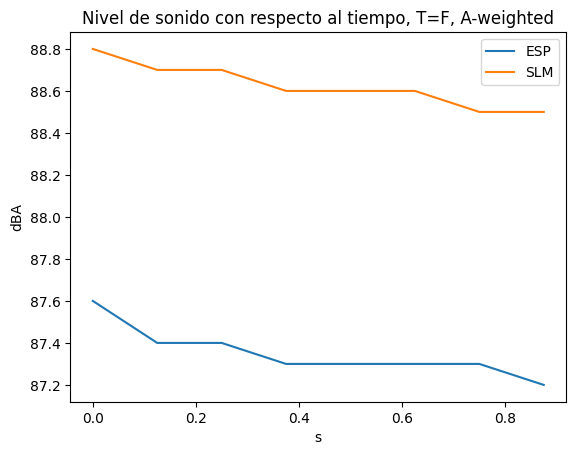

In [9]:
plot_time_progression(offset_data_F_wted, offset_data_F_wted_ref, "dBA", f", T=F, A-weighted", 0.125)

Valor del offset

In [10]:
print(calculate_offset(offset_data_F_wted, offset_data_F_wted_ref))

1.2749999999999986


## Periodo S, con ponderación A

Mediciones en función del tiempo

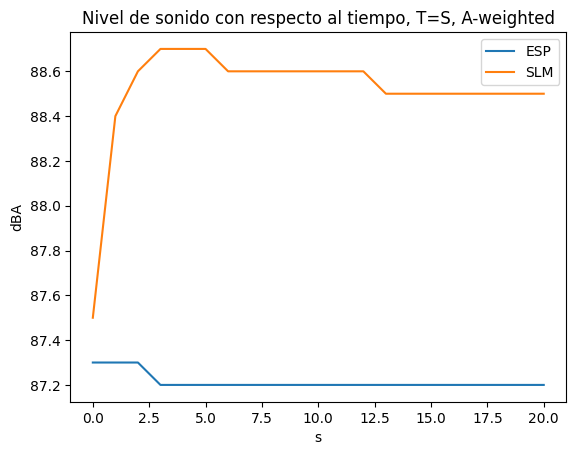

In [11]:
plot_time_progression(offset_data_S_wted, offset_data_S_wted_ref, "dBA", f", T=S, A-weighted", 1.0)

Valor del offset

In [12]:
print(calculate_offset(offset_data_S_wted, offset_data_S_wted_ref))

1.2999999999999965


## Conclusiones

Como el ESP se usará siempre con ponderación A y periodo S, se escoge el periodo correspondiente a esas condiciones.

In [13]:
print(round(calculate_offset(offset_data_S_wted, offset_data_S_wted_ref), 1))

1.3
